In [1]:
import pickle
import math
import numpy as np

import matplotlib
font = {'size':16}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.facecolor'] = 'white'
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib as mpl

import seaborn as sns

import pickle

import numpy as np

## Scenario 1

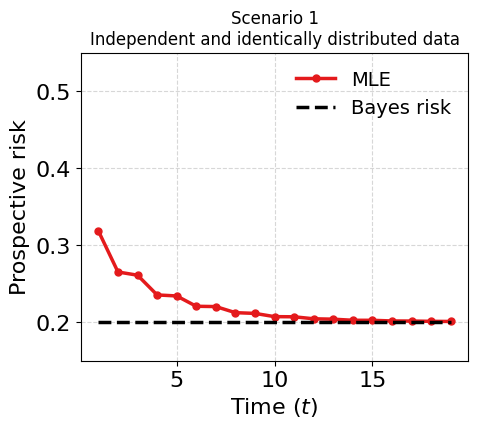

In [2]:
file = '../experiments/binary_data/results/scenario1.npy'
outputs = np.load(file, allow_pickle=True).tolist()


plt.figure(figsize=(5, 4))
plt.plot(outputs['time'], outputs['risk'], lw=2.5, marker='o', ms=5, label='MLE', color='#e41a1c')
plt.plot(outputs['time'], 0.2 * np.ones(len(outputs['time'])), ls='dashed', color='k', lw=2.5, label='Bayes risk')
plt.locator_params(axis='x', nbins=5)
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"Prospective risk")
plt.legend(frameon=False, fontsize=14)
plt.grid(alpha=0.5, ls='--')
plt.title('Scenario 1' + '\n' + 'Independent and identically distributed data', fontsize=12)
plt.ylim([0.15, 0.55])
plt.savefig("../figures/syn_scenario1.pdf", bbox_inches="tight")
plt.show()

## Scenario 2

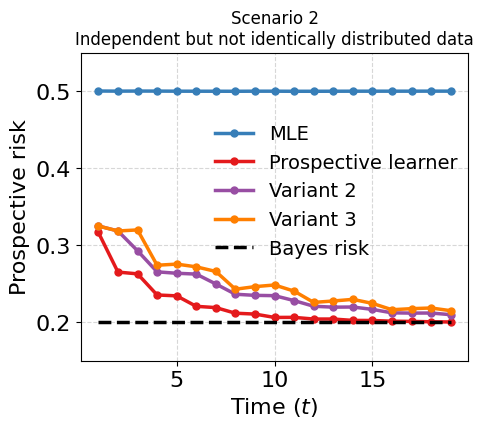

In [3]:
file = '../experiments/binary_data/results/scenario2.npy'
outputs = np.load(file, allow_pickle=True).tolist()

labels = [r'MLE', r'Prospective learner', r'Variant 2', r'Variant 3']
cols = ['#377eb8', '#e41a1c', '#984ea3', '#ff7f00']

# swap lines:
tmp = np.array(outputs['risk'][:, 1])
outputs['risk'][:, 1] = outputs['risk'][:, 3]
outputs['risk'][:, 3] = tmp

plt.figure(figsize=(5, 4))
for i, label in enumerate(labels):
    #if i == 0: continue
    plt.plot(outputs['time'], outputs['risk'][:, i], lw=2.5, marker='o', ms=5, label=label, c=cols[i])
plt.plot(outputs['time'], 0.2 * np.ones(len(outputs['time'])), ls='dashed', color='k', lw=2.5, label='Bayes risk')
plt.locator_params(axis='x', nbins=5)
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"Prospective risk")
plt.legend(frameon=False, fontsize=14, loc=0, bbox_to_anchor=(0.3, 0.55))
plt.grid(alpha=0.5, ls='--')
plt.title('Scenario 2' + '\n' + 'Independent but not identically distributed data', fontsize=12)

plt.ylim([0.15, 0.55])

plt.savefig("../figures/syn_scenario2.pdf", bbox_inches="tight")
plt.show()

## Scenario 3

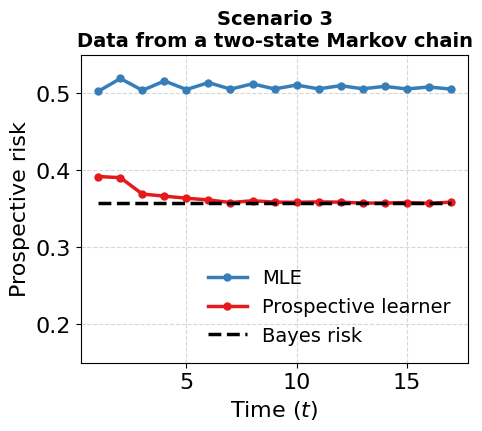

In [4]:
file = '../experiments/binary_data/results/scenario3_disc.npy'
outputs = np.load(file, allow_pickle=True).tolist()

labels = [r'MLE', r'Prospective learner']
keys = ['avg_erm', 'avg_pr']
cols = ['#377eb8', '#e41a1c']

plt.figure(figsize=(5, 4))
for i, label in enumerate(labels):
    plt.plot(np.arange(1, 18, 1), outputs[keys[i]], lw=2.5, marker='o', ms=5, label=label, c=cols[i])
plt.plot(np.arange(1, 18, 1), 0.357 * np.ones(17), ls='dashed', color='k', lw=2.5, label='Bayes risk')
plt.locator_params(axis='x', nbins=5)
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"Prospective risk")
plt.legend(frameon=False, fontsize=14, loc='lower right')
plt.grid(alpha=0.5, ls='--')
plt.title('Scenario 3' + '\n' + 'Data from a two-state Markov chain', fontsize=14, fontweight='bold')
plt.ylim([0.15, 0.55])

plt.savefig("../figures/syn_scenario3.pdf", bbox_inches="tight")

plt.show()

## Scenario 4

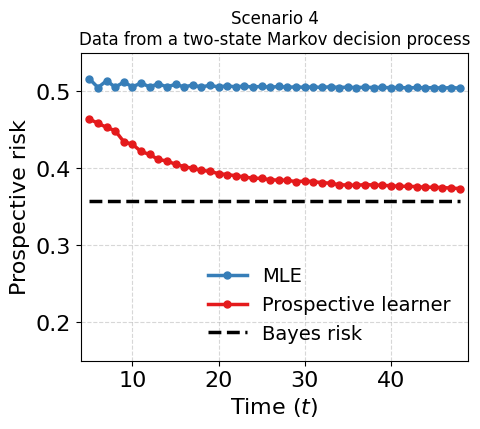

In [5]:
file = '../experiments/binary_data/results/scenario4_disc.npy'
outputs = np.load(file, allow_pickle=True).tolist()

labels = [r'MLE', r'Prospective learner']
keys = ['all_erm', 'all_pr']
cols = ['#377eb8', '#e41a1c']

plt.figure(figsize=(5, 4))

for i, label in enumerate(labels):
    plt.plot(np.arange(5, 49, 1), np.mean(outputs[keys[i]], axis=-1), lw=2.5, marker='o', ms=5, label=label, c=cols[i])
plt.locator_params(axis='x', nbins=5)
plt.plot(np.arange(5, 49, 1), 0.357 * np.ones(44), ls='dashed', color='k', lw=2.5, label='Bayes risk')
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"Prospective risk")
plt.legend(frameon=False, fontsize=14, loc='lower right')
plt.grid(alpha=0.5, ls='--')
plt.title('Scenario 4' + '\n' + 'Data from a two-state Markov decision process', fontsize=12)
plt.ylim([0.15, 0.55])
plt.xlim([4, 49])

plt.savefig("../figures/syn_scenario4.pdf", bbox_inches="tight")


plt.show()

## Full Figure 

In [12]:
class Data_Scenario3():
    def __init__(self, p=0.9, τ=30, max_t=1000):
        self.p = [[p, 1-p], [1-p, p]]
        self.τ = τ
        self.max_t = max_t

    def get_samples(self, t):
        # y0 = np.random.choice([0, 1])
        y0 = 1
        y_seq = [y0]
        # for _ in range(self.max_t-1):
        for _ in range(t + 10 - 1):
            y_seq.append(np.random.choice([0, 1], p=self.p[y_seq[-1]]))
        # y_train, y_test = y_seq[:t], y_seq[t:]
        return y_seq
    
class Data_Scenario4():
    def __init__(self, p=0.9, τ=30, max_t=1000):
        self.p = [[p, 1-p], [1-p, p]]
        self.τ = τ
        self.max_t = max_t
        gamma = 0.9
        self.gamma_vals = np.array([gamma**i for i in range(max_t)])

class MDP():
    def __init__(self):
        α = 0.1
        β = 0.1

        # T(a_t, s_t) = P(s_{t+1} | s_t, a_t)
        self.T = np.array([
            [[α, 1-α],
             [1-α, α]],
            [[β, 1-β],
             [1-β, β]],
        ])
        self.state = np.random.choice([0, 1])

    def step(self, action):
        y_prev = self.state
        action = int(action)

        y_next = np.random.choice([0, 1], p=self.T[action, y_prev])
        loss = np.abs(action - y_next)
        self.state = y_next

        return y_prev, loss
    
def get_data(t):
    mdp = MDP()

    Z_t = []
    A_t = []
    L_t = []
    for i in range(t):
        action = np.random.choice([0, 1])
        z_true, loss = mdp.step(action)
        Z_t.append(z_true)
        A_t.append(action)
        L_t.append(loss)
    return Z_t, A_t, L_t

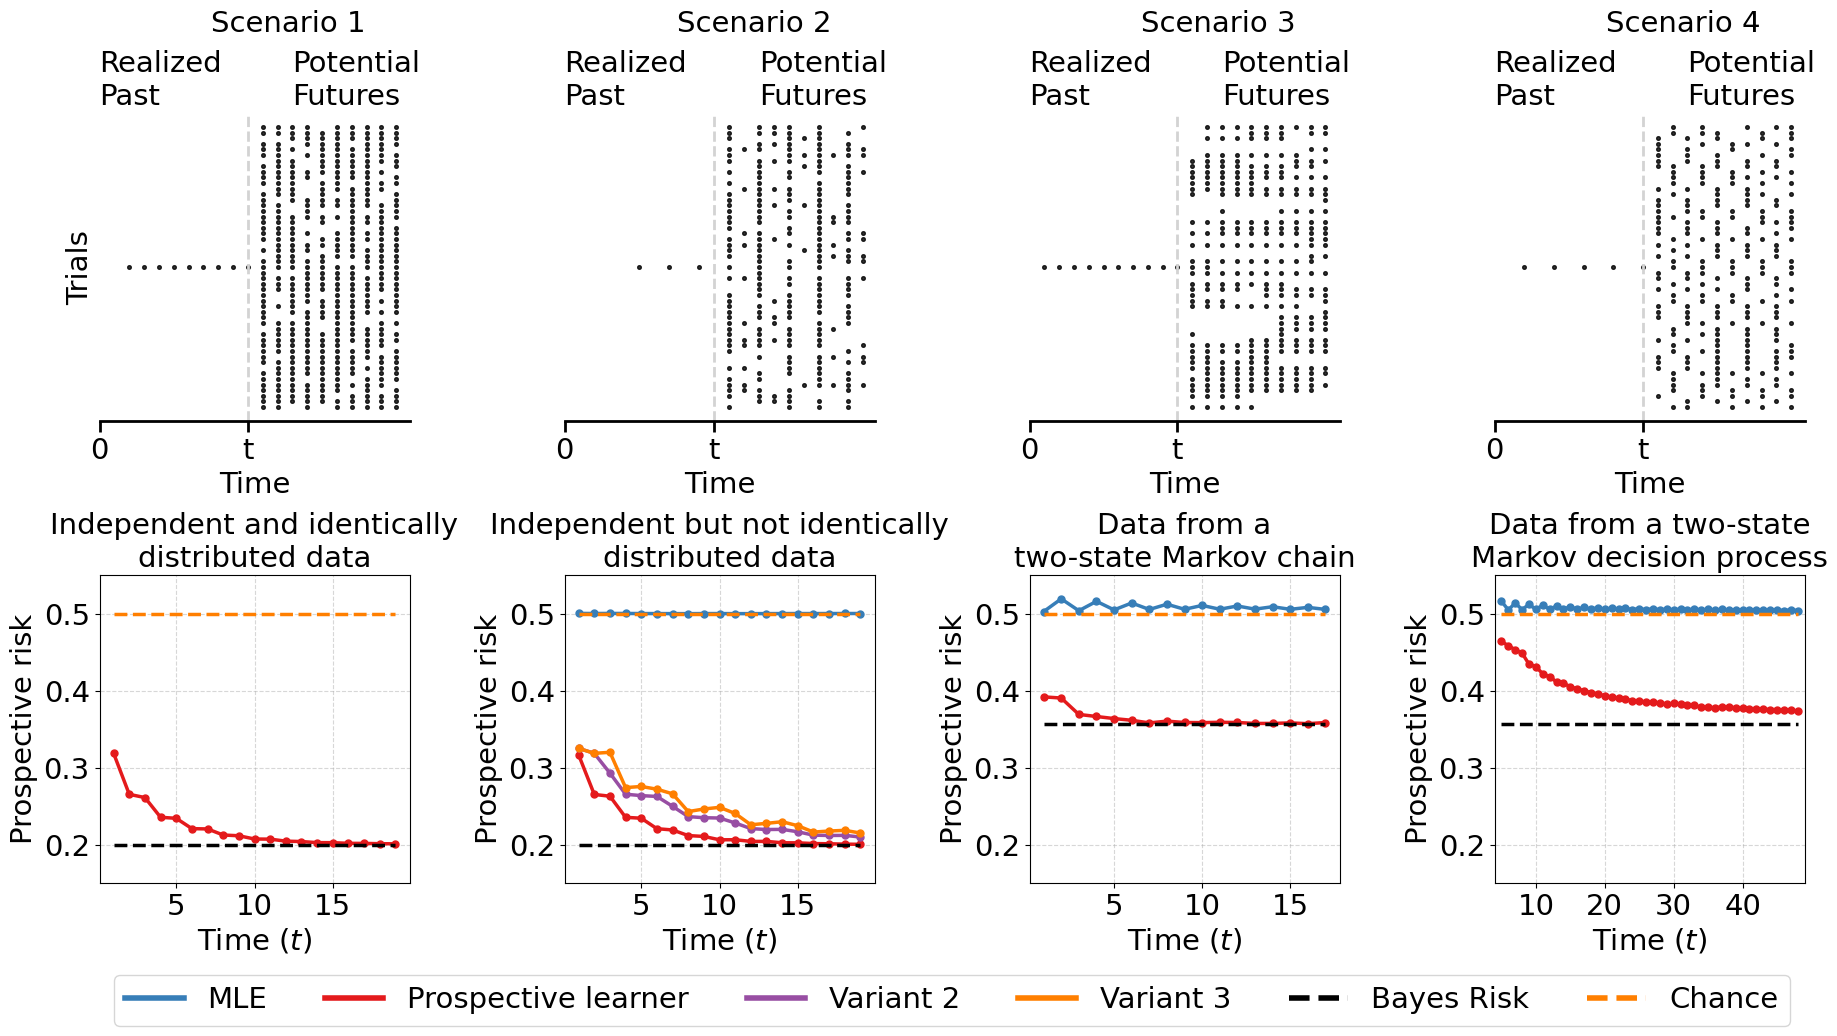

In [35]:
fig, axes = plt.subplots(2, 4, figsize=(22, 10))

np.random.seed(1996)

fontsize = 21
marker_size = 7
p = 0.8
q = 0.2
T = 20
T_initial = 10
T_end = 20
reps_1 = 51
reps_2 = 100
initial_show = int(reps_1/2)

## Senario 1
outcomes = np.random.binomial(1, p, size=(reps_1 , T_end))
outcomes[:initial_show,:T_initial] = np.zeros((initial_show,T_initial))
outcomes[initial_show+1:,:T_initial] = np.zeros((reps_1-1-initial_show,T_initial))
t_list = np.arange(1, T+1, 1)
outcomes = outcomes.astype(float)
outcomes[outcomes==0] = np.nan
for rep in range(reps_1):
    y = (outcomes[rep,:]+rep) * outcomes[rep,:]
    # print(y)
    if rep != initial_show:
        y[:T_initial] = np.nan
    axes[0, 0].scatter(t_list,y, c = 'black',alpha = 0.8,s = marker_size)

### Senario 2
pattern = np.array([True, False]*T_end)[:T_end]

# sample a bunch of sequences from the process
p_pattern = np.zeros(T_end)
p_pattern[pattern] = p
p_pattern[~pattern] = q
outcomes = np.random.binomial(1, p_pattern, size=(reps_1, T_end))
outcomes[:initial_show,:T_initial] = np.zeros((initial_show,T_initial))
outcomes[initial_show+1:,:T_initial] = np.zeros((reps_1-1-initial_show,T_initial))
outcomes = outcomes.astype(float)
outcomes[outcomes==0] = np.nan
t_list = np.arange(1, T+1, 1)
for rep in range(reps_1):
    y = (outcomes[rep,:]+rep) * outcomes[rep,:]
    if rep != initial_show:
        y[:T_initial] = np.nan
    axes[0, 1].scatter(t_list,y, c = 'black',alpha = 0.8,s = marker_size)

### Senario 3
t_list = np.arange(1, T+1, 1)
outcomes = np.zeros((reps_1,T))
for i in range(reps_1):
    outcomes_i = Data_Scenario3().get_samples(t = 10)
    outcomes[i,:] = outcomes_i
outcomes[:initial_show,:T_initial] = np.zeros((initial_show,T_initial))
outcomes[initial_show+1:,:T_initial] = np.zeros((reps_1-1-initial_show,T_initial))
outcomes = outcomes.astype(float)
outcomes[outcomes==0] = np.nan
for rep in range(reps_1):
    y = (outcomes[rep,:]+rep) * outcomes[rep,:]
    if rep != initial_show:
        y[:T_initial] = np.nan
    axes[0, 2].scatter(t_list,y, c = 'black',alpha = 0.8,s = marker_size)

### Scenario 4
t_list = np.arange(1, T+1, 1)
outcomes = np.zeros((reps_1,T))
for i in range(reps_1):
    z, _, _ = get_data(20)
    outcomes_i = z
    outcomes[i,:] = outcomes_i
outcomes[:initial_show,:T_initial] = np.zeros((initial_show,T_initial))
outcomes[initial_show+1:,:T_initial] = np.zeros((reps_1-1-initial_show,T_initial))
outcomes = outcomes.astype(float)
outcomes[outcomes==0] = np.nan
for rep in range(reps_1):
    y = (outcomes[rep,:]+rep) * outcomes[rep,:]
    if rep != initial_show:
        y[:T_initial] = np.nan
    axes[0, 3].scatter(t_list,y, c = 'black',alpha = 0.8,s = marker_size)


for i in range(4):
    axes[0, i].set_yticks([])
    axes[0, i].set_xticks([0,10],[0,'t'])
    axes[0, i].set_xlabel('Time', fontsize=fontsize)

    axes[0, i].spines['top'].set_visible(False)
    axes[0, i].spines['left'].set_visible(False)
    axes[0, i].spines['right'].set_visible(False)
    axes[0, i].spines['bottom'].set_linewidth(2)

    axes[0, i].tick_params(axis='x', labelsize=fontsize, length=8, width=2)

    axes[0, i].axvline(x=10, color='#D3D3D3', linestyle='--', linewidth=2)

    axes[0, i].text(0, 55, 'Realized\nPast', fontsize=fontsize)
    axes[0, i].text(13, 55, 'Potential\nFutures', fontsize=fontsize)
    axes[0, i].text(7.5, 68, f'Scenario {i+1}', fontsize=fontsize)

    if i ==0:
        axes[0, i].set_ylabel('Trials', fontsize=fontsize)
    else:
        axes[0, i].set_ylabel('')

plt.savefig("../figures/rastergram.pdf", format="pdf", bbox_inches="tight") 

# scenario 1
ax = axes[1, 0]
file = '../experiments/binary_data/results/scenario1.npy'
outputs = np.load(file, allow_pickle=True).tolist()

ax.plot(outputs['time'], outputs['risk'], lw=2.5, marker='o', ms=5, label='MLE', color='#e41a1c')
ax.plot(outputs['time'], 0.2 * np.ones(len(outputs['time'])), ls='dashed', color='k', lw=2.5, label='Bayes risk')

ax.plot(outputs['time'], 0.5 * np.ones(len(outputs['time'])), ls='dashed', color='#ff7f00', lw=2.5, label='Chance')


ax.locator_params(axis='x', nbins=5)
ax.set_xlabel(r"Time ($t$)", fontsize=fontsize)
ax.set_ylabel(r"Prospective risk", fontsize=fontsize)
# ax.legend(frameon=False, fontsize=14)
ax.grid(alpha=0.5, ls='--')
ax.set_title('Independent and identically\ndistributed data', fontsize=fontsize)
ax.set_ylim([0.15, 0.55])

# scenario 2
ax = axes[1, 1]
file = '../experiments/binary_data/results/scenario2.npy'
outputs = np.load(file, allow_pickle=True).tolist()

labels = [r'MLE', r'Prospective learner', r'Variant 2', r'Variant 3']
cols = ['#377eb8', '#e41a1c', '#984ea3', '#ff7f00']

# swap lines:
tmp = np.array(outputs['risk'][:, 1])
outputs['risk'][:, 1] = outputs['risk'][:, 3]
outputs['risk'][:, 3] = tmp

for i, label in enumerate(labels):
    #if i == 0: continue
    ax.plot(outputs['time'], outputs['risk'][:, i], lw=2.5, marker='o', ms=5, label=label, c=cols[i])
ax.plot(outputs['time'], 0.2 * np.ones(len(outputs['time'])), ls='dashed', color='k', lw=2.5, label='Bayes risk')

ax.plot(outputs['time'], 0.5 * np.ones(len(outputs['time'])), ls='dashed', color='#ff7f00', lw=2.5, label='Chance')


ax.locator_params(axis='x', nbins=5)
ax.set_xlabel(r"Time ($t$)", fontsize=fontsize)
ax.set_ylabel(r"Prospective risk", fontsize=fontsize)
# ax.legend(frameon=False, fontsize=14, loc=0, bbox_to_anchor=(0.3, 0.55))
ax.grid(alpha=0.5, ls='--')
ax.set_title('Independent but not identically\ndistributed data', fontsize=fontsize)
ax.set_ylim([0.15, 0.55])

# scenario 3
ax = axes[1, 2]
file = '../experiments/binary_data/results/scenario3_disc.npy'
outputs = np.load(file, allow_pickle=True).tolist()

labels = [r'MLE', r'Prospective learner']
keys = ['avg_erm', 'avg_pr']
cols = ['#377eb8', '#e41a1c']

for i, label in enumerate(labels):
    ax.plot(np.arange(1, 18, 1), outputs[keys[i]], lw=2.5, marker='o', ms=5, label=label, c=cols[i])
ax.plot(np.arange(1, 18, 1), 0.357 * np.ones(17), ls='dashed', color='k', lw=2.5, label='Bayes risk')
ax.plot(np.arange(1, 18, 1), 0.5 * np.ones(17), ls='dashed', color='#ff7f00', lw=2.5, label='Chance')


ax.locator_params(axis='x', nbins=5)
ax.set_xlabel(r"Time ($t$)", fontsize=fontsize)
ax.set_ylabel(r"Prospective risk", fontsize=fontsize)
# ax.legend(frameon=False, fontsize=14, loc='lower right')
ax.grid(alpha=0.5, ls='--')
ax.set_title('Data from a\ntwo-state Markov chain', fontsize=fontsize)
ax.set_ylim([0.15, 0.55])

# scenario 4
ax = axes[1, 3]
file = '../experiments/binary_data/results/scenario4_disc.npy'
outputs = np.load(file, allow_pickle=True).tolist()

labels = [r'MLE', r'Prospective learner']
keys = ['all_erm', 'all_pr']
cols = ['#377eb8', '#e41a1c']

for i, label in enumerate(labels):
    ax.plot(np.arange(5, 49, 1), np.mean(outputs[keys[i]], axis=-1), lw=2.5, marker='o', ms=5, label=label, c=cols[i])
ax.locator_params(axis='x', nbins=5)
ax.plot(np.arange(5, 49, 1), 0.357 * np.ones(44), ls='dashed', color='k', lw=2.5, label='Bayes risk')
ax.plot(np.arange(5, 49, 1), 0.5 * np.ones(44), ls='dashed', color='#ff7f00', lw=2.5, label='Chance')


ax.set_xlabel(r"Time ($t$)", fontsize=fontsize)
ax.set_ylabel(r"Prospective risk", fontsize=fontsize)
# ax.legend(frameon=False, fontsize=14, loc='lower right')
ax.grid(alpha=0.5, ls='--')
ax.set_title('Data from a two-state\nMarkov decision process', fontsize=fontsize)
ax.set_ylim([0.15, 0.55])
ax.set_xlim([4, 49])

plt.subplots_adjust(
    wspace=0.50,
    hspace=0.50
)

from matplotlib.lines import Line2D
cols = ['#377eb8', '#e41a1c', '#984ea3', '#ff7f00']
labels = ["MLE", "Prospective learner", "Variant 2", "Variant 3"]
legend_elements = [
        Line2D([0], [0], color=cols[i], lw=4, label=learner) for i, learner in enumerate(labels)
    ] + [
        Line2D([0], [0], color='k', lw=4, ls='--', label="Bayes Risk")
    ] + [
        Line2D([0], [0], color='#ff7f00', lw=4, ls='--', label="Chance")
    ]

for i in range(4):
    axes[1, i].tick_params(axis='x', labelsize=fontsize)
    axes[1, i].tick_params(axis='y', labelsize=fontsize)

plt.legend(
    handles=legend_elements, 
    loc='best', 
    ncol=6, 
    fontsize=fontsize, 
    frameon=True,
    markerscale=2.,
    scatterpoints=1,
    bbox_to_anchor=(1.0, -0.25)
)
plt.savefig("../figures/binary_exp.pdf", bbox_inches="tight")
plt.show()